<a href="https://colab.research.google.com/github/tjp1992/stock_backend/blob/master/notebooks/EDA_tj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yahoo Finace

In [1]:
import requests

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":"013310.KQ"}

headers = {
    'x-api-key': "f9UhpI5RoV133W4A7zPUyG2PAVVp5Sj3ANXNYHwh"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"message":"Forbidden","hint":"Sign up for API key https://financeapi.net/tutorial"}


# News Article Scrape API using NLTK

In [2]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

ticker = "AAPL"
# ticker = '060310'
url = "https://financialmodelingprep.com/financial-summary/" + ticker
request = requests.get(url)
print(request.text)

parser = BeautifulSoup(request.text, "html.parser")
news_html = parser.find_all('a', {'class': 'article-item'})
print(news_html[0])

sentiments = []
for i in range(0, len(news_html)):
    sentiments.append(
            {
                'ticker': ticker,
                'date': news_html[i].find('h5', {'class': 'article-date'}).text,
                'title': news_html[i].find('h4', {'class': 'article-title'}).text,
                'text': news_html[i].find('p', {'class': 'article-text'}).text
            }
        )

df = pd.DataFrame(sentiments)
df = df.set_index('date')


<!doctype html><html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D"><head ><title>AAPL 148.79 -1.25 -0.83% Apple Inc. - FinancialModelingPrep</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" http-equiv="X-UA-Compatible" content="IE=edge"><meta data-n-head="ssr" name="viewport" content="width=device-width, initial-scale=1"><meta data-n-head="ssr" name="fragment" content="!"><meta data-n-head="ssr" name="theme-color" content="#333"><meta data-n-head="ssr" name="theme-color" content="#ffffff"><meta data-n-head="ssr" property="og:site_name" content="Financial Modeling Prep"><meta data-n-head="ssr" property="twitter:card" content="summary_large_image"><meta data-n-head="ssr" property="twitter:site" content="@financial_mod"><meta data-n-head="ssr" property="twitter:images0" content="/screenshot/solo/_.png"><meta data-n-head="ssr" property="og:type" content="website"><meta data-n-head="ssr" property="fb:app_id" content="140395543294453"

IndexError: list index out of range

In [ ]:
df

,ticker,title,text
date,,,
2022-03-22 19:41,AAPL,Apple Services Experience Outage for Second Da...,"The App Store, Apple Music, Apple Books and Po..."
2022-03-22 18:04,AAPL,"Apple services including Music, Mac App store ...","Apple Inc services including Apple Music, Mac ..."
2022-03-22 16:09,AAPL,"Market Extends Bullish Action; Tesla Soars, Ap...","Market Extends Bullish Action; Tesla Soars, Ap..."
2022-03-22 14:45,AAPL,"Final Trades: Cloud stocks, Apple, Moderna & more","The ""Halftime Report"" traders give their top p..."
2022-03-22 14:35,AAPL,Apple (AAPL) Resolves Massive Service Outage,Apple (AAPL) suffered a massive outage of its ...
2022-03-22 14:02,AAPL,XLK: Apple And Microsoft Likely To Weigh The I...,XLK: Apple And Microsoft Likely To Weigh The I...
2022-03-22 13:47,AAPL,"MSFT, AAPL, AMZN, FB, NVDA: Why Are Tech Stock...",Given the rather impressive amount of uncertai...
2022-03-22 13:33,AAPL,EU in final push for Big Tech crackdown,Big tech companies could face unprecedented cu...
2022-03-22 12:48,AAPL,These Tech-Heavy ETFs Offer Inflation Protection,Inflation is clearly proving far more persiste...


# IEX API

In [2]:
import requests
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# urls = 'https://iex.lewagon.com/stable/stock/aapl/chart/3m'
# urls = 'https://iex.lewagon.com/stable/stock//chart/3m'
# urls = 'https://iex.lewagon.com/ref-data/exchanges'

# Calls the URL to get the stock code (ticker)
def get_data(ticker):
    urls = 'https://iex.lewagon.com/stable/search/{}'
    api_data = requests.get(urls.format(ticker)).json()

    symbol = ""
    for stock in api_data:
        if 'KR' == stock['region']:
            symbol = stock['symbol']

    url = 'https://iex.lewagon.com/stable/stock/{}/chart/1y'
    result = requests.get(url.format(symbol)).json()
    result
    df = pd.DataFrame(result)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    return df

In [3]:
symbol = ""
for li in api_data:
  if 'KR' == li['region']:
    symbol = li['symbol']

url = 'https://iex.lewagon.com/stable/stock/{}/chart/1y'
result = requests.get(url.format(symbol)).json()
result
df = pd.DataFrame(result)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = get_data(159580)

In [4]:
go.Figure(data = [
                  go.Candlestick(
                      x=df.index,
                      open = df['uOpen'],
                      high = df['uHigh'],
                      low = df['uLow'],
                      close = df['uClose'],
                                 )
])

In [ ]:
df.shape

(245, 25)

In [ ]:
go.Figure(data = [
                  go.Candlestick(
                      x=df.index,
                      open = df['uOpen'],
                      high = df['uHigh'],
                      low = df['uLow'],
                      close = df['uClose'],
                                 )
])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2021-03-30 to 2022-03-29
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   close                 245 non-null    int64  
 1   high                  245 non-null    int64  
 2   low                   245 non-null    int64  
 3   open                  245 non-null    int64  
 4   symbol                245 non-null    object 
 5   volume                245 non-null    int64  
 6   id                    245 non-null    object 
 7   key                   245 non-null    object 
 8   subkey                245 non-null    object 
 9   updated               245 non-null    float64
 10  changeOverTime        244 non-null    float64
 11  marketChangeOverTime  244 non-null    float64
 12  uOpen                 245 non-null    int64  
 13  uClose                244 non-null    float64
 14  uHigh                 245 non-null    int64  
 15  uLow

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.columns

Index(['close', 'high', 'low', 'open', 'symbol', 'volume', 'id', 'key',
       'subkey', 'updated', 'changeOverTime', 'marketChangeOverTime', 'uOpen',
       'uClose', 'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh',
       'fLow', 'fVolume', 'label', 'change', 'changePercent'],
      dtype='object')

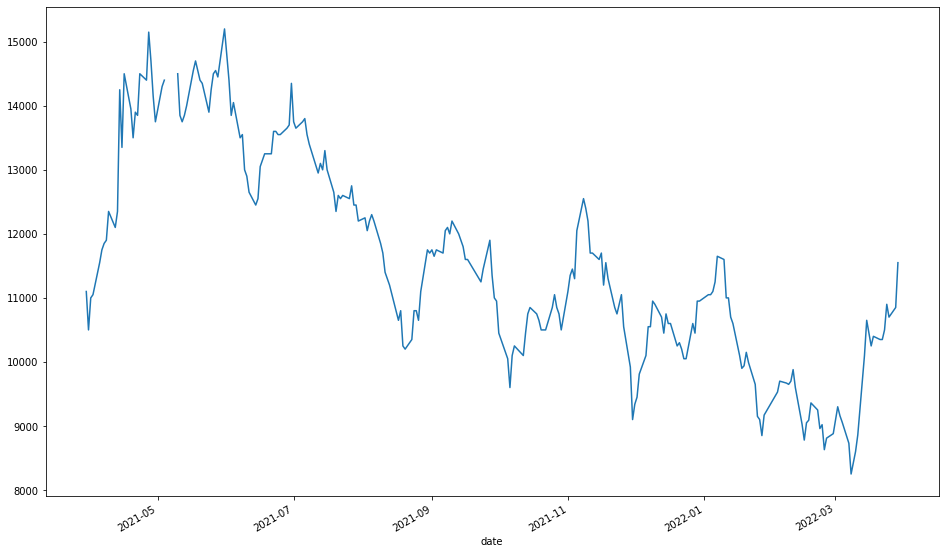

In [17]:
plt.figure(figsize=(16,10))
df['uClose'].plot();

In [19]:
df.tail()

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2022-03-23,10500,10800,10350,10500,159580-KQ,361441,HISTORICAL_PRICES,159580-KQ,,1.648031e+12,...,10350,361441,10500,10500.0,10800,10350,361441,"Mar 23, 22",150,0.0145
2022-03-24,10900,11250,10350,10550,159580-KQ,868463,HISTORICAL_PRICES,159580-KQ,,1.648120e+12,...,10350,868463,10550,10900.0,11250,10350,868463,"Mar 24, 22",400,0.0381
2022-03-25,10700,10850,10600,10750,159580-KQ,187933,HISTORICAL_PRICES,159580-KQ,,1.648206e+12,...,10600,187933,10750,10700.0,10850,10600,187933,"Mar 25, 22",-200,-0.0183
2022-03-28,10850,11150,10750,10800,159580-KQ,393272,HISTORICAL_PRICES,159580-KQ,,1.648465e+12,...,10750,393272,10800,10850.0,11150,10750,393272,"Mar 28, 22",150,0.0140
2022-03-29,11550,11700,10700,10700,159580-KQ,2371850,HISTORICAL_PRICES,159580-KQ,,1.648552e+12,...,10700,2371850,10700,11550.0,11700,10700,2371850,"Mar 29, 22",700,0.0645
